In [1]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
!gdown 1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-

Downloading...
From (original): https://drive.google.com/uc?id=1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-
From (redirected): https://drive.usercontent.google.com/download?id=1hZK1rshl4dJVEPkUPykU5cZs_ANyTWp-&confirm=t&uuid=2b49e1e8-b30b-4ae3-ae13-24882cf1c7e8
To: /content/data.zip
100% 272M/272M [00:02<00:00, 94.3MB/s]


In [3]:
!unzip -qq data.zip

In [4]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


In [2]:
import keras
print(keras.__version__)

3.0.5


In [15]:
import pandas as pd
import numpy as np

In [29]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory='./train/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset='training'
)
class_names = train_dataset.class_names
val_dataset = image_dataset_from_directory(
    directory='./train/',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset='validation'
)

Found 8829 files belonging to 11 classes.
Using 7947 files for training.
Found 8829 files belonging to 11 classes.
Using 882 files for validation.


In [30]:
class_names

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
from keras.applications.resnet50 import preprocess_input

train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

In [5]:
model = keras.applications.ResNet50(input_shape= (224, 224, 3),
                                      classes= 11,
                                      weights= 'imagenet',
                                      include_top= False,
                                      pooling= 'avg'
                                      )
model.trainable = False
x = keras.layers.Flatten()(model.output)
x = keras.layers.Dense(128,activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(64,activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(11, activation='softmax')(x)
model = keras.models.Model(model.input, x)

In [6]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,858,955 (91.01 MB)

 Trainable params: 271,243 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model.keras", save_best_only=True, monitor="val_loss")

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

initial_learning_rate = 0.001

def scheduler(epoch, lr):
    if epoch % 10 == 0:
        return lr * 0.9
    else:
        return lr

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [8]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=40, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 79s 247ms/step - accuracy: 0.5007 - loss: 1.4700 - val_accuracy: 0.8163 - val_loss: 0.5628
Epoch 2/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 45s 141ms/step - accuracy: 0.7633 - loss: 0.7241 - val_accuracy: 0.8413 - val_loss: 0.4903
Epoch 3/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 45s 159ms/step - accuracy: 0.8045 - loss: 0.6076 - val_accuracy: 0.8526 - val_loss: 0.4495
Epoch 4/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - accuracy: 0.8272 - loss: 0.5153 - val_accuracy: 0.8503 - val_loss: 0.4218
Epoch 5/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 33s 129ms/step - accuracy: 0.8419 - loss: 0.4728 - val_accuracy: 0.8707 - val_loss: 0.4087
Epoch 6/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.8577 - loss: 0.4509 - val_accuracy: 0.8424 - val_loss: 0.4458
Epoch 7/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - accuracy: 0.8614 - loss: 0.4117 - val_accuracy: 0.8458 - val_loss: 0.4531
Epoch 8/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 41s 135ms/step - accuracy: 0.8765 - loss: 0

In [10]:
best_model = keras.models.load_model("model.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 438 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [11]:
best_model.evaluate(val_dataset)

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.8745 - loss: 0.4019


[0.4083607494831085, 0.8707482814788818]

In [31]:
test_dataset = image_dataset_from_directory(
    directory='./test/',
    label_mode=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)
image_names = [img.split('/')[-1] for img in test_dataset.file_paths]
test_dataset = test_dataset.map(lambda x: preprocess_input(x))

Found 1201 files.


In [35]:
predictions = best_model.predict(test_dataset)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


In [36]:
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]

In [37]:
submission = pd.DataFrame(columns=['image_name', 'cat_id'])
submission['image_name'] = image_names
submission['cat_id'] = predictions
submission

,image_name,cat_id
0,-56lhw2AKjYI0Hnt.jpg,0
1,-6OdHXCBItIArPyk.jpg,2
2,-7241lsvPiVpNVFV.jpg,9
3,-8-0wltLEZBDTM5M.jpg,9
4,-GcrzANWUmrjk2tb.jpg,0
...,...,...
1196,zNIgOhLGUPCyp7vl.jpg,2
1197,zhzjJeI8FwQDZQCE.jpg,1
1198,zizDow_ExDVnz9QS.jpg,2
1199,znpJGKcXxvmOU_nK.jpg,0


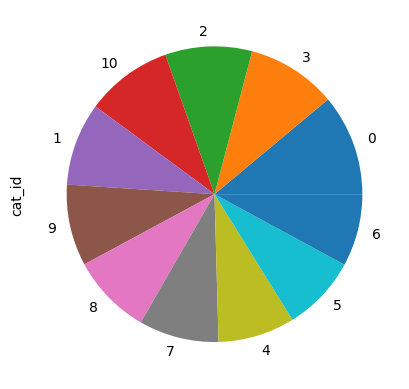

In [38]:
from matplotlib import pyplot as plt
submission['cat_id'].value_counts().plot.pie()
plt.show()